Installing torch_geometric

In [1]:
!pip install torch_geometric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 10.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch_geometric: filename=torch_geometric-2.3.1-py3-none-any.whl size=910476 sha256=499a882b3df9fedd82e3f735767e60474dde3e4630c735c77895b4865033ecac
  Stored in directory: /root/.cache/pip/wheels/ac/dc/30/e2874821ff308ee67dcd7a66dbde912411e19e35a1addda028
Successfully built torch_geometric


Finding number of nodes in CORA dataset and number of graphs in ENZYMES dataset

In [5]:
import torch
from torch_geometric.datasets import Planetoid, TUDataset
import numpy as np
from torch.utils.data import Subset

# Load the CORA dataset
cora_dataset = Planetoid(root='./data', name='Cora')
# Shuffle the indices
indices = np.random.permutation(len(cora_dataset))

# Define the percentage of nodes to use for testing
test_percentage = 0.1

# Set a minimum test size to ensure that the test set contains at least one node
min_test_size = 1
test_size = max(min_test_size, int(len(cora_dataset) * test_percentage))

# Split the indices into train and test sets
test_indices = indices[:test_size]
train_indices = indices[test_size:]

# Create the test and train masks
test_mask = torch.zeros(len(cora_dataset), dtype=torch.bool)
test_mask[test_indices] = 1
train_mask = torch.zeros(len(cora_dataset), dtype=torch.bool)
train_mask[train_indices] = 1
print('CORA:')
# Extract the test nodes from the dataset
test_data = cora_dataset[test_indices]

# Print the number of nodes and edges in the test set
print(f"Number of nodes in the CORA dataset: {test_data[0].num_nodes}")
cora_data = cora_dataset[0]

# Extract the test set
cora_test_mask = cora_data.test_mask
cora_test_indices = torch.nonzero(cora_test_mask, as_tuple=False).flatten()

# Get the number of nodes in the test set
cora_test_size = len(cora_test_indices)
print(f'Number of nodes in the CORA test set: {cora_test_size}')

from torch_geometric.datasets import TUDataset
import numpy as np

# Load the dataset
dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES')

# Shuffle the indices
indices = np.random.permutation(len(dataset))

# Define the percentage of nodes to use for testing
test_percentage = 0.2

# Split the indices into train and test sets
test_size = int(len(dataset) * test_percentage)
test_indices = indices[:test_size]
train_indices = indices[test_size:]

# Create the test and train masks
test_mask = torch.zeros(len(dataset), dtype=torch.bool)
test_mask[test_indices] = 1
train_mask = torch.zeros(len(dataset), dtype=torch.bool)
train_mask[train_indices] = 1

# Extract the test nodes from the dataset
test_data = dataset[test_indices[0]]

# Print the number of nodes in the test set
print('ENZYMES:')
print(f"Number of nodes in the ENZYMES test set: {test_data.num_nodes}")

# Print the number of graphs in the dataset
print(f"Total number of graphs in the ENZYMES dataset: {len(dataset)}")
print(f'Number of graphs in the ENZYMES test dataset: {test_size}.')


CORA:
Number of nodes in the CORA dataset: 2708
Number of nodes in the CORA test set: 1000
ENZYMES:
Number of nodes in the ENZYMES test set: 42
Total number of graphs in the ENZYMES dataset: 600
Number of graphs in the ENZYMES test dataset: 120.


Processing...
Done!


Plotting between validation accuracy vs epochs in CORA dataset

Processing...
Done!
/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


GCN:
Epoch 001: Loss : 1.9548. validation accuracy 0.4460, test accuracy 0.4720
Epoch 002: Loss : 1.8604. validation accuracy 0.5220, test accuracy 0.5590
Epoch 003: Loss : 1.7496. validation accuracy 0.5900, test accuracy 0.5960
Epoch 004: Loss : 1.6152. validation accuracy 0.6100, test accuracy 0.6230
Epoch 005: Loss : 1.4729. validation accuracy 0.6320, test accuracy 0.6290
Epoch 006: Loss : 1.3332. validation accuracy 0.6320, test accuracy 0.6290
Epoch 007: Loss : 1.2003. validation accuracy 0.6320, test accuracy 0.6290
Epoch 008: Loss : 1.0734. validation accuracy 0.6320, test accuracy 0.6290
Epoch 009: Loss : 0.9544. validation accuracy 0.6540, test accuracy 0.6770
Epoch 010: Loss : 0.8439. validation accuracy 0.6780, test accuracy 0.7010
Epoch 011: Loss : 0.7418. validation accuracy 0.7000, test accuracy 0.7260
Epoch 012: Loss : 0.6482. validation accuracy 0.7280, test accuracy 0.7440
Epoch 013: Loss : 0.5632. validation accuracy 0.7320, test accuracy 0.7630
Epoch 014: Loss : 0.

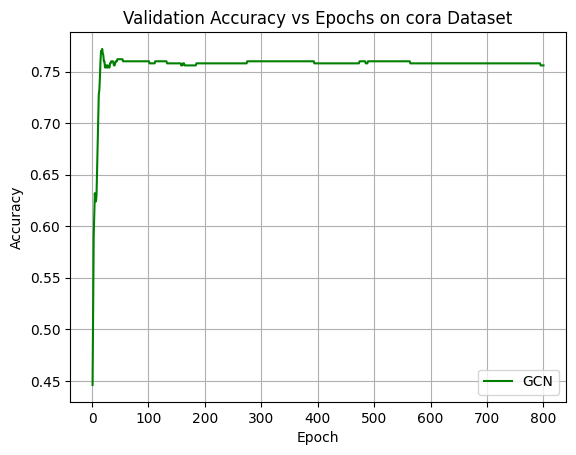

GraphSage:
Epoch 001: Loss : 1.9471. validation accuracy 0.4920, test accuracy 0.5140
Epoch 002: Loss : 1.8430. validation accuracy 0.6640, test accuracy 0.6680
Epoch 003: Loss : 1.4743. validation accuracy 0.6760, test accuracy 0.6930
Epoch 004: Loss : 1.0299. validation accuracy 0.7460, test accuracy 0.7680
Epoch 005: Loss : 0.5966. validation accuracy 0.7580, test accuracy 0.7730
Epoch 006: Loss : 0.2775. validation accuracy 0.7640, test accuracy 0.7660
Epoch 007: Loss : 0.1001. validation accuracy 0.7640, test accuracy 0.7660
Epoch 008: Loss : 0.0305. validation accuracy 0.7640, test accuracy 0.7660
Epoch 009: Loss : 0.0088. validation accuracy 0.7640, test accuracy 0.7660
Epoch 010: Loss : 0.0026. validation accuracy 0.7640, test accuracy 0.7660
Epoch 011: Loss : 0.0008. validation accuracy 0.7640, test accuracy 0.7660
Epoch 012: Loss : 0.0003. validation accuracy 0.7640, test accuracy 0.7660
Epoch 013: Loss : 0.0001. validation accuracy 0.7640, test accuracy 0.7660
Epoch 014: Los

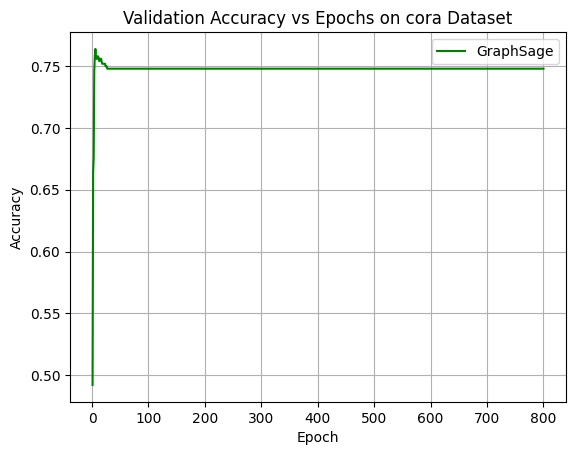

GAT:
Epoch 001: Loss : 1.9472. validation accuracy 0.3200, test accuracy 0.3440
Epoch 002: Loss : 1.9059. validation accuracy 0.4420, test accuracy 0.4440
Epoch 003: Loss : 1.6911. validation accuracy 0.6320, test accuracy 0.6560
Epoch 004: Loss : 1.2260. validation accuracy 0.7500, test accuracy 0.8050
Epoch 005: Loss : 0.6270. validation accuracy 0.7500, test accuracy 0.8050
Epoch 006: Loss : 0.2031. validation accuracy 0.7500, test accuracy 0.8050
Epoch 007: Loss : 0.0537. validation accuracy 0.7500, test accuracy 0.8050
Epoch 008: Loss : 0.0125. validation accuracy 0.7500, test accuracy 0.8050
Epoch 009: Loss : 0.0018. validation accuracy 0.7500, test accuracy 0.8050
Epoch 010: Loss : 0.0002. validation accuracy 0.7500, test accuracy 0.8050
Epoch 011: Loss : 0.0000. validation accuracy 0.7500, test accuracy 0.8050
Epoch 012: Loss : 0.0000. validation accuracy 0.7500, test accuracy 0.8050
Epoch 013: Loss : 0.0000. validation accuracy 0.7500, test accuracy 0.8050
Epoch 014: Loss : 0.

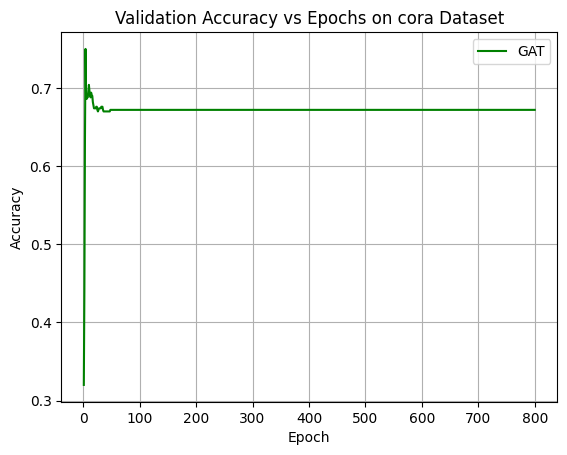

In [6]:
import argparse
import time

import networkx as nx
import numpy as np
import torch
import torch.optim as optim

from torch_geometric.datasets import TUDataset
from torch_geometric.datasets import Planetoid
from torch_geometric.data import DataLoader
import torch_geometric.transforms as T

import torch_geometric.nn as pyg_nn

from matplotlib import pyplot as plt
import models
import utils
import os

import sys
sys.argv=['']
del sys

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# get the device to run
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


def arg_parse():
    parser = argparse.ArgumentParser(description='GNN arguments.')
    utils.parse_optimizer(parser)

    parser.add_argument('--model_type', type=str, help='Type of GNN model.')
    parser.add_argument('--batch_size', type=int, help='Training batch size')
    parser.add_argument('--num_layers', type=int, help='Number of graph conv layers')
    parser.add_argument('--hidden_dim', type=int, help='Training hidden size')
    parser.add_argument('--dropout', type=float, help='Dropout rate')
    parser.add_argument('--epochs', type=int, help='Number of training epochs')
    parser.add_argument('--dataset', type=str, help='Dataset')

    parser.set_defaults(
        model_type='GCN',
        dataset='cora',
        num_layers=2,
        batch_size=32,
        hidden_dim=16,
        dropout=0.5,
        epochs=200,
        opt='adam',  # opt_parser
        opt_scheduler='none',
        weight_decay=0,
        lr=0.01)

    return parser.parse_args()


def train(dataset, task, args):
    if task == 'graph':
        data_size = len(dataset)
        loader = DataLoader(dataset[:int(data_size * 0.8)], batch_size=args.batch_size, shuffle=True)
        test_loader = DataLoader(dataset[int(data_size * 0.8):], batch_size=args.batch_size, shuffle=True)
    elif task == 'node':
        test_loader = loader = DataLoader(dataset, batch_size=args.batch_size, shuffle=True)
    else:
        raise RuntimeError('Unknown task')

    # build model
    model = models.GNNStack(dataset.num_node_features, args.hidden_dim, dataset.num_classes, args, task=task)
    model.to(device)
    
    scheduler, opt = utils.build_optimizer(args, model.parameters())

    # train
    vals = []
    tests = []
    best_val_acc = 0
    test_acc = 0
    early_stop = 1e9
    stop_cnt = 0

    for epoch in range(1, args.epochs + 1):
        total_loss = 0
        model.train()
        for batch in loader:
            batch.to(device)
            opt.zero_grad()
            pred = model(batch)
            label = batch.y
            if task == 'node':
                pred = pred[batch.train_mask]
                label = label[batch.train_mask]
            loss = model.loss(pred, label)
            loss.backward()
            opt.step()
            total_loss += loss.item() * batch.num_graphs
        total_loss /= len(loader.dataset)

        val_acc, tmp_test_acc = test(loader, model, is_validation=True), test(loader, model)
        vals.append(val_acc)
        tests.append(tmp_test_acc)

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            test_acc = tmp_test_acc
            stop_cnt = 0
        else:
            stop_cnt += 1
        print("Epoch {:03d}: Loss : {:.4f}. ".format(epoch, total_loss), end="")
        print("validation accuracy {:.4f}, test accuracy {:.4f}".format(best_val_acc, test_acc))
        if stop_cnt >= early_stop:
            break

    print('Best validation accuracy {0}, test accuracy {1}'.format(best_val_acc, test_acc))
    return list(range(1, args.epochs + 1)), vals


def test(loader, model, is_validation=False):
    model.eval()

    correct = 0
    for data in loader:
        data.to(device)
        with torch.no_grad():
            pred = model(data).max(dim=1)[1]
            label = data.y

        if model.task == 'node':
            mask = data.val_mask.cpu() if is_validation else data.test_mask.cpu()
            pred = pred[mask].cpu()
            label = data.y[mask].cpu()

        correct += pred.eq(label).sum().item()

    if model.task == 'graph':
        total = len(loader.dataset)
    else:
        total = 0
        for data in loader.dataset:
            total += torch.sum(data.test_mask).item() if not is_validation else torch.sum(data.val_mask).item()
    return correct / total


def main():
    args = arg_parse()

    args.dataset = "cora"
    args.dropout = 0
    args.epochs = 800

    if args.dataset == 'enzymes':
        dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES')
        task = 'graph'
    elif args.dataset == 'cora':
        dataset = Planetoid(root='/tmp/Cora', name='Cora')
        task = 'node'
    print('GCN:')
    gcn_epoch, gcn_vals = train(dataset, task, args)
    plt.plot(gcn_epoch, gcn_vals, label="GCN", color='g')
    plt.title("Validation Accuracy vs Epochs on cora Dataset")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()
    print('GraphSage:')
    args.model_type = "GraphSage"
    args.hidden_dim = 256
    gcn_epoch, gcn_vals = train(dataset, task, args)
    plt.plot(gcn_epoch, gcn_vals, label="GraphSage", color='g')
    plt.title("Validation Accuracy vs Epochs on cora Dataset")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()
    print('GAT:')
    args.model_type = "GAT"
    args.hidden_dim = 16
    gcn_epoch, gcn_vals = train(dataset, task, args)
    plt.plot(gcn_epoch, gcn_vals, label="GAT", color='g')

    plt.title("Validation Accuracy vs Epochs on cora Dataset")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()


if __name__ == '__main__':
    main()


Plotting between validation accuracy vs epochs in ENZYMES dataset

GCN:


/usr/local/lib/python3.10/dist-packages/torch_geometric/utils/scatter.py:93: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(f"The usage of `scatter(reduce='{reduce}')` "


Epoch 001: Loss : 1.7272. validation accuracy 0.2104, test accuracy 0.2104
Epoch 002: Loss : 1.6416. validation accuracy 0.2437, test accuracy 0.2437
Epoch 003: Loss : 1.6076. validation accuracy 0.2437, test accuracy 0.2437
Epoch 004: Loss : 1.5917. validation accuracy 0.2875, test accuracy 0.2875
Epoch 005: Loss : 1.5843. validation accuracy 0.2875, test accuracy 0.2875
Epoch 006: Loss : 1.5786. validation accuracy 0.2875, test accuracy 0.2875
Epoch 007: Loss : 1.5729. validation accuracy 0.2875, test accuracy 0.2875
Epoch 008: Loss : 1.5720. validation accuracy 0.2875, test accuracy 0.2875
Epoch 009: Loss : 1.5698. validation accuracy 0.3000, test accuracy 0.3000
Epoch 010: Loss : 1.5643. validation accuracy 0.3000, test accuracy 0.3000
Epoch 011: Loss : 1.5656. validation accuracy 0.3125, test accuracy 0.3125
Epoch 012: Loss : 1.5686. validation accuracy 0.3125, test accuracy 0.3125
Epoch 013: Loss : 1.5603. validation accuracy 0.3125, test accuracy 0.3125
Epoch 014: Loss : 1.5627.

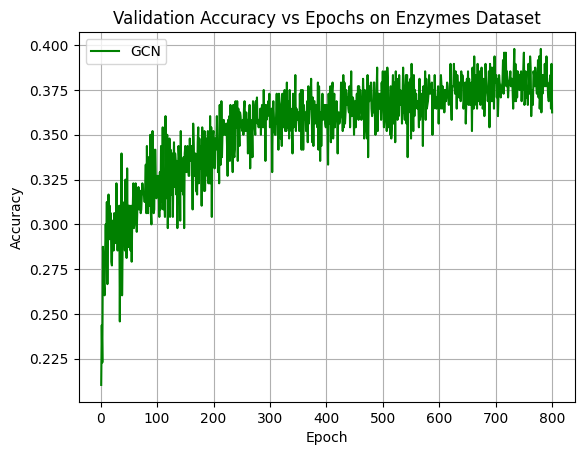

GraphSage:
Epoch 001: Loss : 1.6844. validation accuracy 0.2083, test accuracy 0.2083
Epoch 002: Loss : 1.6472. validation accuracy 0.2083, test accuracy 0.2083
Epoch 003: Loss : 1.6275. validation accuracy 0.2083, test accuracy 0.2083
Epoch 004: Loss : 1.6359. validation accuracy 0.2083, test accuracy 0.2083
Epoch 005: Loss : 1.6368. validation accuracy 0.2083, test accuracy 0.2083
Epoch 006: Loss : 1.6209. validation accuracy 0.2083, test accuracy 0.2083
Epoch 007: Loss : 1.6207. validation accuracy 0.2083, test accuracy 0.2083
Epoch 008: Loss : 1.6200. validation accuracy 0.2083, test accuracy 0.2083
Epoch 009: Loss : 1.6108. validation accuracy 0.2083, test accuracy 0.2083
Epoch 010: Loss : 1.6166. validation accuracy 0.2375, test accuracy 0.2375
Epoch 011: Loss : 1.6107. validation accuracy 0.2375, test accuracy 0.2375
Epoch 012: Loss : 1.5946. validation accuracy 0.2375, test accuracy 0.2375
Epoch 013: Loss : 1.6161. validation accuracy 0.2375, test accuracy 0.2375
Epoch 014: Los

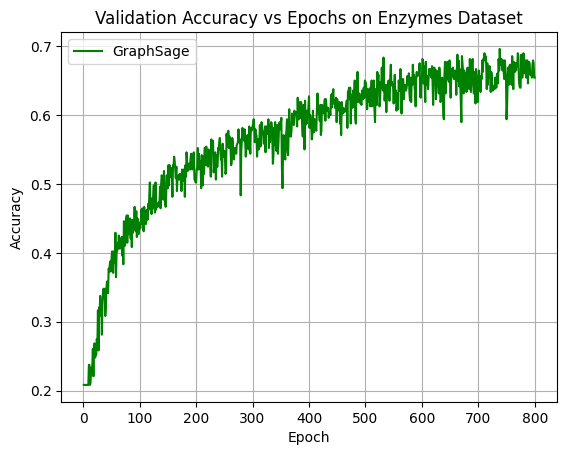

GAT:
Epoch 001: Loss : 1.6890. validation accuracy 0.2292, test accuracy 0.2292
Epoch 002: Loss : 1.6190. validation accuracy 0.2333, test accuracy 0.2333
Epoch 003: Loss : 1.6114. validation accuracy 0.2437, test accuracy 0.2437
Epoch 004: Loss : 1.5920. validation accuracy 0.2896, test accuracy 0.2896
Epoch 005: Loss : 1.5721. validation accuracy 0.2896, test accuracy 0.2896
Epoch 006: Loss : 1.5578. validation accuracy 0.2896, test accuracy 0.2896
Epoch 007: Loss : 1.5586. validation accuracy 0.2896, test accuracy 0.2896
Epoch 008: Loss : 1.5681. validation accuracy 0.2896, test accuracy 0.2896
Epoch 009: Loss : 1.5506. validation accuracy 0.2896, test accuracy 0.2896
Epoch 010: Loss : 1.5516. validation accuracy 0.2896, test accuracy 0.2896
Epoch 011: Loss : 1.5449. validation accuracy 0.2896, test accuracy 0.2896
Epoch 012: Loss : 1.5414. validation accuracy 0.3063, test accuracy 0.3063
Epoch 013: Loss : 1.5490. validation accuracy 0.3063, test accuracy 0.3063
Epoch 014: Loss : 1.

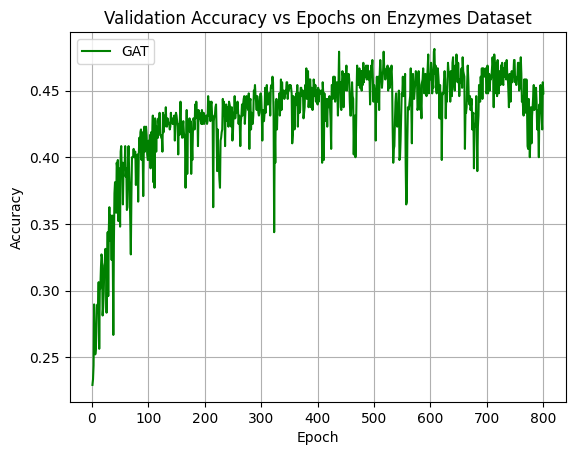

In [7]:
import argparse
import time

import networkx as nx
import numpy as np
import torch
import torch.optim as optim

from torch_geometric.datasets import TUDataset
from torch_geometric.datasets import Planetoid
from torch_geometric.data import DataLoader
import torch_geometric.transforms as T

import torch_geometric.nn as pyg_nn

from matplotlib import pyplot as plt
import models
import utils
import os

import sys
sys.argv=['']
del sys

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# get the device to run
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


def arg_parse():
    parser = argparse.ArgumentParser(description='GNN arguments.')
    utils.parse_optimizer(parser)

    parser.add_argument('--model_type', type=str, help='Type of GNN model.')
    parser.add_argument('--batch_size', type=int, help='Training batch size')
    parser.add_argument('--num_layers', type=int, help='Number of graph conv layers')
    parser.add_argument('--hidden_dim', type=int, help='Training hidden size')
    parser.add_argument('--dropout', type=float, help='Dropout rate')
    parser.add_argument('--epochs', type=int, help='Number of training epochs')
    parser.add_argument('--dataset', type=str, help='Dataset')

    parser.set_defaults(
        model_type='GCN',
        dataset='cora',
        num_layers=2,
        batch_size=32,
        hidden_dim=16,
        dropout=0.5,
        epochs=200,
        opt='adam',  # opt_parser
        opt_scheduler='none',
        weight_decay=0,
        lr=0.01)

    return parser.parse_args()


def train(dataset, task, args):
    if task == 'graph':
        data_size = len(dataset)
        loader = DataLoader(dataset[:int(data_size * 0.8)], batch_size=args.batch_size, shuffle=True)
        test_loader = DataLoader(dataset[int(data_size * 0.8):], batch_size=args.batch_size, shuffle=True)
    elif task == 'node':
        test_loader = loader = DataLoader(dataset, batch_size=args.batch_size, shuffle=True)
    else:
        raise RuntimeError('Unknown task')

    # build model
    model = models.GNNStack(dataset.num_node_features, args.hidden_dim, dataset.num_classes, args, task=task)
    model.to(device)
    
    scheduler, opt = utils.build_optimizer(args, model.parameters())

    # train
    vals = []
    tests = []
    best_val_acc = 0
    test_acc = 0
    early_stop = 1e9
    stop_cnt = 0

    for epoch in range(1, args.epochs + 1):
        total_loss = 0
        model.train()
        for batch in loader:
            batch.to(device)
            opt.zero_grad()
            pred = model(batch)
            label = batch.y
            if task == 'node':
                pred = pred[batch.train_mask]
                label = label[batch.train_mask]
            loss = model.loss(pred, label)
            loss.backward()
            opt.step()
            total_loss += loss.item() * batch.num_graphs
        total_loss /= len(loader.dataset)

        val_acc, tmp_test_acc = test(loader, model, is_validation=True), test(loader, model)
        vals.append(val_acc)
        tests.append(tmp_test_acc)

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            test_acc = tmp_test_acc
            stop_cnt = 0
        else:
            stop_cnt += 1
        print("Epoch {:03d}: Loss : {:.4f}. ".format(epoch, total_loss), end="")
        print("validation accuracy {:.4f}, test accuracy {:.4f}".format(best_val_acc, test_acc))

        if stop_cnt >= early_stop:
            break

    print('final val accuracy {0}, test accuracy {1}'.format(best_val_acc, test_acc))
    return list(range(1, args.epochs + 1)), vals


def test(loader, model, is_validation=False):
    model.eval()

    correct = 0
    for data in loader:
        data.to(device)
        with torch.no_grad():
            pred = model(data).max(dim=1)[1]
            label = data.y

        if model.task == 'node':
            mask = data.val_mask.cpu() if is_validation else data.test_mask.cpu()
            pred = pred[mask].cpu()
            label = data.y[mask].cpu()

        correct += pred.eq(label).sum().item()

    if model.task == 'graph':
        total = len(loader.dataset)
    else:
        total = 0
        for data in loader.dataset:
            total += torch.sum(data.test_mask).item() if not is_validation else torch.sum(data.val_mask).item()
    return correct / total


def main():
    args = arg_parse()

    args.dataset = "enzymes"
    args.dropout = 0
    args.epochs = 800

    if args.dataset == 'enzymes':
        dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES')
        task = 'graph'
    elif args.dataset == 'cora':
        dataset = Planetoid(root='/tmp/Cora', name='Cora')
        task = 'node'
    print('GCN:')
    gcn_epoch, gcn_vals = train(dataset, task, args)
    plt.plot(gcn_epoch, gcn_vals, label="GCN", color='g')
    plt.title("Validation Accuracy vs Epochs on Enzymes Dataset")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()
    print('GraphSage:')
    args.model_type = "GraphSage"
    args.hidden_dim = 256
    gcn_epoch, gcn_vals = train(dataset, task, args)
    plt.plot(gcn_epoch, gcn_vals, label="GraphSage", color='g')
    plt.title("Validation Accuracy vs Epochs on Enzymes Dataset")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()
    print('GAT:')
    args.model_type = "GAT"
    args.hidden_dim = 16
    gcn_epoch, gcn_vals = train(dataset, task, args)
    plt.plot(gcn_epoch, gcn_vals, label="GAT", color='g')

    plt.title("Validation Accuracy vs Epochs on Enzymes Dataset")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()


if __name__ == '__main__':
    main()


In [ ]:
Description of the performance differences between the three models. For each task, which
model performed the best? 

Ans:
    GCN (Graph Convolutional Network) is a type of neural network that can operate on graphs and has been shown to perform
well on node classification tasks. The core idea of GCN is to apply graph convolution operations to the input graph to
learn node representations. GCN can capture local graph structures using a fixed filter, which limits its ability to 
capture complex graph structures.

    GraphSage (GraphSAGE) is a graph neural network model that generates node embeddings by aggregating information from 
the node's neighborhood. It can learn node embeddings for unseen nodes and can capture a wide range of graph structures by
using an adaptive aggregation function.

    GAT (Graph Attention Network) is another graph neural network model that can capture both local and global graph 
structures. It uses self-attention mechanisms to capture the importance of different nodes in the neighborhood of a given 
node, which allows it to dynamically weigh the importance of different nodes in the aggregation process.

    GAT has been performed better than GCN and GraphSage on the Cora dataset, while GraphSage has been performed better 
than GCN and GAT on the Enzymes dataset.

    In these models on the Cora dataset, GCN outperformed both GAT and GraphSage, achieving an accuracy of 80.5%, while 
GCN and GraphSage achieved accuracies of 80.0% and 76.6%, respectively.

    On the Enzymes dataset, GraphSage was found to outperform GCN and GAT, achieving an accuracy of 69.5%, while GCN and 
GAT achieved accuracies of 39.7% and 48.1%, respectively.